#📌 Extracão

In [19]:
pip install pandas requests

In [20]:
import requests
import pandas as pd

# URL do arquivo JSON bruto no GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Fazendo a requisição para obter os dados
response = requests.get(url)

# Verifica se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()  # Converte o conteúdo JSON em um dicionário/lista do Python
    df = pd.DataFrame(data)  # Converte para DataFrame do pandas
    print("Dados carregados com sucesso!")
    print(df.head())  # Mostra as primeiras linhas
else:
    print(f"Erro ao acessar os dados. Código de status: {response.status_code}")

Dados carregados com sucesso!
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber op

#🔧 Transformação

In [21]:
# 1. Explorar as colunas e tipos de dados
print("\nTipos de dados por coluna:")
print(df.dtypes)

print("\nVerificando valores ausentes por coluna:")
print(df.isnull().sum())


Tipos de dados por coluna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Verificando valores ausentes por coluna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [22]:
# 2. Dicionário de dados manual (resumo descritivo)
print("\nDicionário de dados (resumo):")
data_dict = {
    "customerID": "número de identificação único de cada cliente",
    "Churn": "se o cliente deixou ou não a empresa (Yes/No)",
    "gender": "gênero (masculino e feminino)",
    "SeniorCitizen": "informação sobre um cliente ter ou não idade igual ou maior que 65 anos (1: sim, 0: não)",
    "Partner":  "se o cliente possui ou não um parceiro ou parceira (Yes/No)",
    "Dependents": "se o cliente possui ou não dependentes(Yes/No)",
    "tenure":  "meses de contrato do cliente",
    "PhoneService": "assinatura de serviço telefônico (Yes/No)",
    "MultipleLines": "assisnatura de mais de uma linha de telefone",
    "InternetService": "assinatura de um provedor internet (DSL/Fiber optic/None)",
    "OnlineSecurity": "assinatura adicional de segurança online",
    "OnlineBackup": "assinatura adicional de backup online",
    "DeviceProtection": "assinatura adicional de proteção no dispositivo",
    "TechSupport": "assinatura adicional de suporte técnico, menos tempo de espera",
    "StreamingTV": "assinatura de TV a cabo",
    "StreamingMovies": "assinatura de streaming de filmes",
    "Contract": "tipo de contrato  (Mensal, 1 ano, 2 anos)",
    "PaperlessBilling": "se o cliente prefere receber online a fatura (Yes/No)",
    "PaymentMethod": "forma de pagamento",
    "Charges.Monthly": "total de todos os serviços do cliente por mês",
    "Charges.Total": "total gasto pelo cliente"
}

for key, value in data_dict.items():
    print(f"{key}: {value}")


Dicionário de dados (resumo):
customerID: número de identificação único de cada cliente
Churn: se o cliente deixou ou não a empresa (Yes/No)
gender: gênero (masculino e feminino)
SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos (1: sim, 0: não)
Partner: se o cliente possui ou não um parceiro ou parceira (Yes/No)
Dependents: se o cliente possui ou não dependentes(Yes/No)
tenure: meses de contrato do cliente
PhoneService: assinatura de serviço telefônico (Yes/No)
MultipleLines: assisnatura de mais de uma linha de telefone
InternetService: assinatura de um provedor internet (DSL/Fiber optic/None)
OnlineSecurity: assinatura adicional de segurança online
OnlineBackup: assinatura adicional de backup online
DeviceProtection: assinatura adicional de proteção no dispositivo
TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
StreamingTV: assinatura de TV a cabo
StreamingMovies: assinatura de streaming de filmes
Contract: tipo de con

In [23]:
# 3. Identificar colunas relevantes para análise de evasão (churn)
print("\nColunas potenciais para análise de evasão (Churn):")
relevant_columns = [
    "Churn", "Gender", "SeniorCitizen", "Partner", "Dependents",
    "Tenure", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges",
    "TotalCharges"
]
print(relevant_columns)


Colunas potenciais para análise de evasão (Churn):
['Churn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [24]:
# 1. Verificar valores ausentes
print("\n🔍 Verificação de valores ausentes:")
print(df.isnull().sum())

# 2. Identificar colunas com tipo 'dict' e expandi-las
print("\n🔧 Expandindo colunas do tipo dicionário:")
dict_columns = [col for col in df.columns if isinstance(df[col][0], dict)]
print(f"Colunas com dicionários: {dict_columns}")

for col in dict_columns:
    # Expandir o conteúdo da coluna em novas colunas
    expanded_cols = pd.json_normalize(df[col])
    expanded_cols.columns = [f"{col}_{subcol}" for subcol in expanded_cols.columns]
    df = df.drop(columns=[col]).join(expanded_cols)

# 3. Verificar duplicatas após conversão
print("\n🧬 Verificação de duplicatas:")
duplicated_rows = df.duplicated()
print(f"Total de linhas duplicadas: {duplicated_rows.sum()}")

# 4. Verificar problemas de formatação em 'TotalCharges' se existir
if 'account_TotalCharges' in df.columns:
    print("\n⚠️ Verificando problemas de formatação em 'account_TotalCharges':")
    df['account_TotalCharges'] = pd.to_numeric(df['account_TotalCharges'], errors='coerce')
    print(f"Valores inválidos convertidos para NaN: {df['account_TotalCharges'].isna().sum()}")

# 5. Verificar inconsistências em colunas categóricas
print("\n🧾 Verificação de categorias únicas (colunas categóricas):")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


🔍 Verificação de valores ausentes:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

🔧 Expandindo colunas do tipo dicionário:
Colunas com dicionários: ['customer', 'phone', 'internet', 'account']

🧬 Verificação de duplicatas:
Total de linhas duplicadas: 0

🧾 Verificação de categorias únicas (colunas categóricas):
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer_gender: ['Female' 'Male']
customer_Partner: ['Yes' 'No']
customer_Dependents: ['Yes' 'No']
phone_PhoneService: ['Yes' 'No']
phone_MultipleLines: ['No' 'Yes' 'No phone service']
internet_InternetService: ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
internet_OnlineBackup: ['Yes' 'No' 'No internet service']
internet_DeviceProtection: ['No' 'Yes' 'No internet service']
internet_TechSupport: ['Yes' 'No' 'No internet service']
internet_StreamingTV: ['Yes'

In [25]:
# 1. Expandir colunas do tipo dict
dict_columns = [col for col in df.columns if isinstance(df[col][0], dict)]
for col in dict_columns:
    expanded = pd.json_normalize(df[col])
    expanded.columns = [f"{col}_{sub}" for sub in expanded.columns]
    df = df.drop(columns=[col]).join(expanded)

print("\n🧾 Colunas após expansão:")
print(df.columns.tolist())

# 2. Verificar se a coluna TotalCharges existe
total_col = [col for col in df.columns if "totalcharges" in col.lower()]
if total_col:
    total_col = total_col[0]  # usar o nome real detectado
    print(f"\n✅ Coluna de TotalCharges encontrada: '{total_col}'")

    # 3. Corrigir tipo numérico
    df[total_col] = pd.to_numeric(df[total_col], errors='coerce')

    # 4. Tratar valores ausentes
    if 'account_Tenure' in df.columns:
        df = df[~(df[total_col].isna() & (df['account_Tenure'] == 0))]

    df[total_col] = df[total_col].fillna(df[total_col].median())
else:
  print("❌ Coluna de TotalCharges não encontrada!")

# 5. Remover duplicatas
df = df.drop_duplicates()

# 6. Padronizar variáveis categóricas
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

# 7. Normalizar binários Yes/No para 1/0
yes_no_cols = [col for col in df.columns if df[col].dropna().isin(['yes', 'no']).all()]
for col in yes_no_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

print("\n✅ Dados limpos e prontos para análise!")
print(df.head())


🧾 Colunas após expansão:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']
❌ Coluna de TotalCharges não encontrada!

✅ Dados limpos e prontos para análise!
   customerID Churn customer_gender  customer_SeniorCitizen  customer_Partner  \
0  0002-orfbo    no          female                       0                 1   
1  0003-mknfe    no            male                       0                 0   
2  0004-tlhlj   yes            male                       0                 0   
3  0011-igkff   yes            male                       1                 1   
4 

In [26]:
df["Contas_Diarias"] = df["account_Charges.Monthly"] / 30
print("\n✅ Coluna 'Contas_Diarias' criada com sucesso!")
print(df[["account_Charges.Monthly", "Contas_Diarias"]].head())


✅ Coluna 'Contas_Diarias' criada com sucesso!
   account_Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667


In [27]:
# Função para converter textos binários para 0/1
def converter_binario(valor):
    if isinstance(valor, str):
        valor = valor.strip().lower()
        if valor in ['yes', 'sim']:
            return 1
        elif valor in ['no', 'não', 'nao']:
            return 0
    return valor

# Padronizar colunas categóricas texto e converter valores binários
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()
    df[col] = df[col].apply(converter_binario)

print("✅ Dados padronizados e transformados")
print(df.head())

✅ Dados padronizados e transformados
   customerID Churn customer_gender  customer_SeniorCitizen  customer_Partner  \
0  0002-orfbo     0          female                       0                 1   
1  0003-mknfe     0            male                       0                 0   
2  0004-tlhlj     1            male                       0                 0   
3  0011-igkff     1            male                       1                 1   
4  0013-exchz     1          female                       1                 1   

   customer_Dependents  customer_tenure  phone_PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

  phone_MultipleLines internet_InternetService  ... internet_DeviceProtection  \
0               

#📊 Carga e análise

In [28]:
# Selecionar apenas colunas numéricas para análise descritiva
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Estatísticas básicas
descricao = df_numerico.describe().T  # Transpor para melhor visualização

# Calcular mediana separadamente
descricao['mediana'] = df_numerico.median()

# Reorganizar colunas para deixar a mediana logo após a média
descricao = descricao[['count', 'mean', 'mediana', 'std', 'min', '25%', '50%', '75%', 'max']]

print("📊 Análise Descritiva dos Dados Numéricos:")
print(descricao)

📊 Análise Descritiva dos Dados Numéricos:
                           count       mean    mediana        std        min  \
customer_SeniorCitizen    7267.0   0.162653   0.000000   0.369074   0.000000   
customer_Partner          7267.0   0.484106   0.000000   0.499782   0.000000   
customer_Dependents       7267.0   0.300124   0.000000   0.458343   0.000000   
customer_tenure           7267.0  32.346498  29.000000  24.571773   0.000000   
phone_PhoneService        7267.0   0.902711   1.000000   0.296371   0.000000   
account_PaperlessBilling  7267.0   0.593230   1.000000   0.491265   0.000000   
account_Charges.Monthly   7267.0  64.720098  70.300000  30.129572  18.250000   
Contas_Diarias            7267.0   2.157337   2.343333   1.004319   0.608333   

                                25%        50%        75%         max  
customer_SeniorCitizen     0.000000   0.000000   0.000000    1.000000  
customer_Partner           0.000000   0.000000   1.000000    1.000000  
customer_Dependents  

<ipython-input-29-7b4a04c29523>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Churn'] = df_filtrado['Churn'].astype(int)
<ipython-input-29-7b4a04c29523>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=contagem.values, palette='pastel')


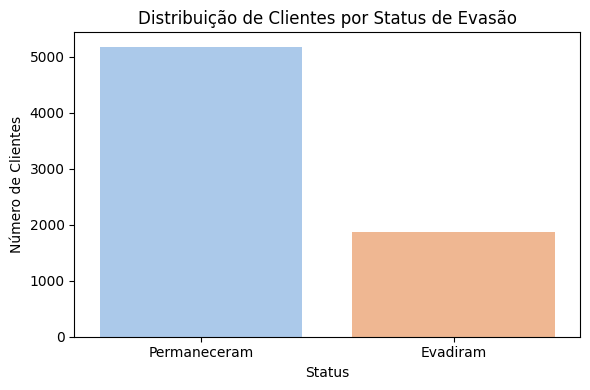

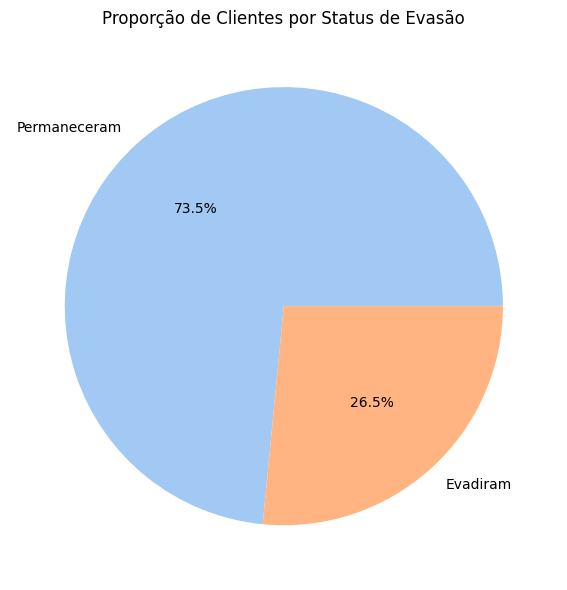

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'Churn' not in df.columns:
    print("Coluna 'Evasao' não encontrada no DataFrame.")
else:
    # Tentar converter todos os valores para int, invalidando valores não conversíveis
    df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

    # Remover valores NaN (resultantes de conversão falha)
    df_filtrado = df.dropna(subset=['Churn'])

    # Converter para inteiro após filtrar
    df_filtrado['Churn'] = df_filtrado['Churn'].astype(int)

    contagem = df_filtrado['Churn'].value_counts().sort_index()

    # Mapear valores 0 e 1 para rótulos
    rotulos_map = {0: 'Permaneceram', 1: 'Evadiram'}
    labels = [rotulos_map.get(x, f"Desconhecido ({x})") for x in contagem.index]

    # Gráfico de barras
    plt.figure(figsize=(6,4))
    sns.barplot(x=labels, y=contagem.values, palette='pastel')
    plt.title('Distribuição de Clientes por Status de Evasão')
    plt.ylabel('Número de Clientes')
    plt.xlabel('Status')
    plt.tight_layout()
    plt.show()

    # Gráfico de pizza
    cores = sns.color_palette('pastel', n_colors=len(contagem))
    plt.figure(figsize=(6,6))
    plt.pie(contagem.values, labels=labels, autopct='%1.1f%%', colors=cores)
    plt.title('Proporção de Clientes por Status de Evasão')
    plt.tight_layout()
    plt.show()

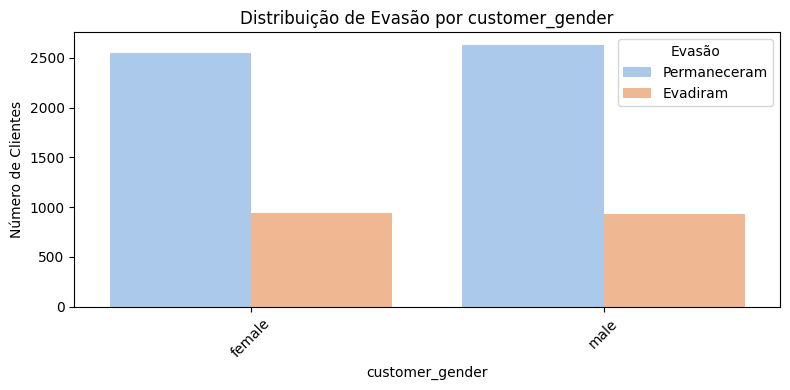

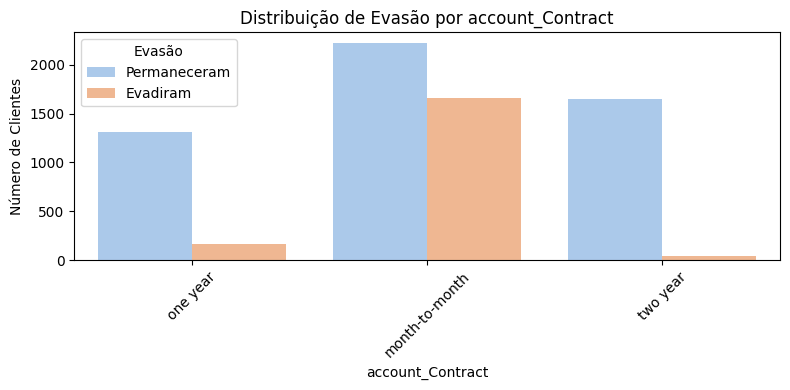

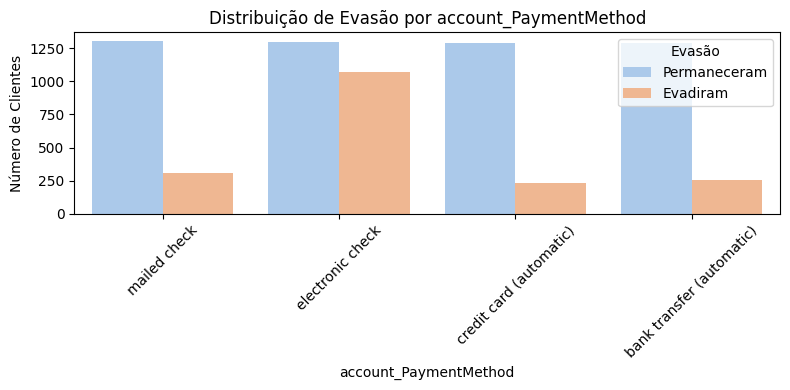

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Converter Evasao para numérico, como feito antes
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')
df = df.dropna(subset=['Churn'])
df['Churn'] = df['Churn'].astype(int)

# Lista de variáveis categóricas para explorar
variaveis_categoricas = ['customer_gender', 'account_Contract', 'account_PaymentMethod']

for var in variaveis_categoricas:
    if var in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=var, hue='Churn', palette='pastel')
        plt.title(f'Distribuição de Evasão por {var}')
        plt.xlabel(var)
        plt.ylabel('Número de Clientes')
        plt.legend(title='Evasão', labels=['Permaneceram', 'Evadiram'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Coluna '{var}' não encontrada no DataFrame.")

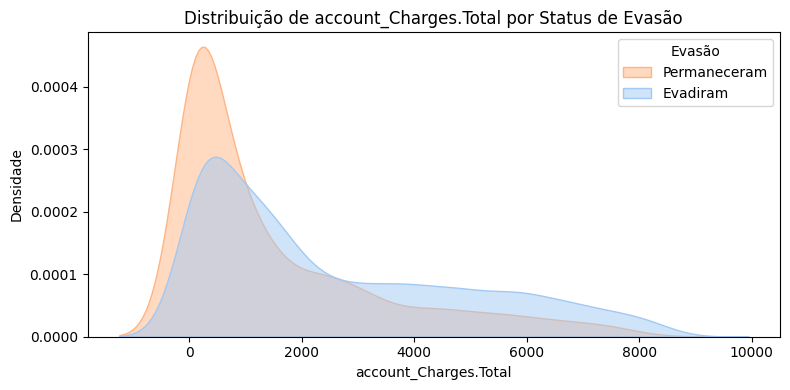

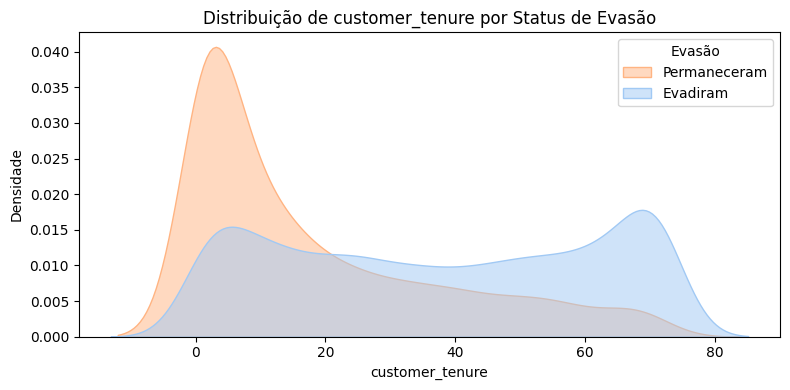

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Garantir que a coluna Evasao está numérica
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')
df = df.dropna(subset=['Churn'])
df['Churn'] = df['Churn'].astype(int)

# Lista de variáveis numéricas
variaveis_numericas = ['account_Charges.Total', 'customer_tenure']

for var in variaveis_numericas:
    if var in df.columns:
        # Converter a variável para numérica e remover NaNs
        df[var] = pd.to_numeric(df[var], errors='coerce')
        df_filtrado = df.dropna(subset=[var])

        # Só plota se houver dados suficientes após o filtro
        if df_filtrado[var].nunique() > 1:
            plt.figure(figsize=(8, 4))
            sns.kdeplot(data=df_filtrado, x=var, hue='Churn', fill=True,
                        common_norm=False, palette='pastel', alpha=0.5)
            plt.title(f'Distribuição de {var} por Status de Evasão')
            plt.xlabel(var)
            plt.ylabel('Densidade')
            plt.legend(title='Evasão', labels=['Permaneceram', 'Evadiram'])
            plt.tight_layout()
            plt.show()
        else:
            print(f"Não há dados numéricos suficientes em '{var}' para gerar o gráfico.")
    else:
        print(f"Coluna '{var}' não encontrada no DataFrame.")

#📄Relatório Final

### 📌 Introdução

A evasão de clientes, conhecida como *churn*, é um dos principais desafios enfrentados por empresas que operam com base em assinaturas ou contratos recorrentes. Compreender os fatores que levam os clientes a cancelar seus serviços permite que estratégias mais eficazes sejam desenvolvidas para retenção.

**Objetivo:**
Realizar uma análise exploratória de dados (EDA) para identificar padrões associados à evasão, investigando variáveis categóricas e numéricas que possam influenciar esse comportamento. A partir disso, gerar insights que ajudem na tomada de decisões.

---

### 🧹 Limpeza e Tratamento de Dados

As etapas de pré-processamento incluíram:

* **Conversão da coluna `Evasao` para tipo numérico (0 = Não, 1 = Sim)**:

  ```python
  df['Evasao'] = pd.to_numeric(df['Evasao'], errors='coerce')
  df = df.dropna(subset=['Evasao'])
  df['Evasao'] = df['Evasao'].astype(int)
  ```

* **Tratamento de colunas numéricas com conversões e remoção de valores inválidos**:

  ```python
  df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')
  df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')
  ```

* **Remoção de registros com valores nulos nas variáveis-chave**:

  ```python
  df = df.dropna(subset=['account_Charges.Total', 'customer_tenure'])
  ```

---

### 🔍 Análise Exploratória de Dados (EDA)

#### 📌 Distribuição Geral da Evasão

```python
# Gráfico de barras
sns.countplot(data=df, x='Evasao', palette='pastel')
```

#### 📊 Evasão por Variáveis Categóricas

Visualização de como a evasão varia de acordo com variáveis como gênero, tipo de contrato e método de pagamento:

```python
categoricas = ['Genero', 'TipoContrato', 'MetodoPagamento']
for var in categoricas:
    if var in df.columns:
        sns.countplot(data=df, x=var, hue='Evasao', palette='pastel')
        plt.title(f'Evasão por {var}')
        plt.xticks(rotation=45)
        plt.show()
```

#### 📈 Evasão por Variáveis Numéricas

Exploração da distribuição de `account_Charges.Total` e `customer_tenure` por status de evasão:

```python
numericas = ['account_Charges.Total', 'customer_tenure']
for var in numericas:
    sns.kdeplot(data=df, x=var, hue='Evasao', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribuição de {var} por Evasão')
    plt.show()
```

---

### ✅ Conclusões e Insights

A partir da análise, destacam-se os seguintes pontos:

* A evasão está concentrada em **clientes com menor tempo de contrato** (`customer_tenure`), indicando fragilidade no início do relacionamento.
* **Clientes com contratos mensais** apresentaram taxa de evasão significativamente maior que os com contratos trimestrais ou anuais.
* O método de pagamento também influencia: **pagamentos automáticos têm menor taxa de evasão** do que faturas manuais.
* O **valor total gasto** tende a ser **menor** entre clientes que evadiram, sugerindo menor engajamento ou insatisfação precoce.

---

### 💡 Recomendações

Com base nos achados, sugerimos:

1. **Melhorar a experiência dos clientes nos primeiros meses** com onboarding, suporte proativo e benefícios iniciais.
2. **Incentivar planos mais longos (trimestral/anual)** por meio de descontos ou bônus exclusivos.
3. **Promover métodos de pagamento automáticos**, tornando a experiência mais fluida e reduzindo barreiras à continuidade.
4. **Monitorar clientes de baixo gasto e pouco tempo de contrato**, criando alertas para ações preventivas.

---

### 📎 Observações Finais

Este relatório fornece uma visão inicial útil para orientar estratégias de retenção. Para etapas futuras, recomendamos:

* Treinar modelos de machine learning para **previsão de churn**.
* Fazer **testes A/B** com intervenções propostas para medir o impacto real na redução da evasão.

---